# Homework #1   Due date: 27 October 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [20]:
# Ertuğrul Demir 260201059
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


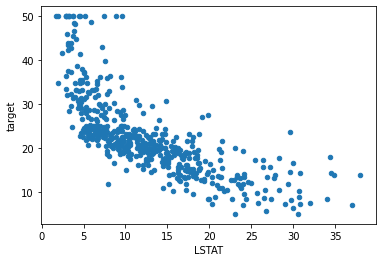

In [5]:
df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population


In [6]:
lr = LinearRegression()
X=df[['LSTAT']]
y=df['target']

In [7]:
lr.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [8]:
print(lr.predict([X.iloc[500]])*1000)   #iloc is the index
#print((np.dot(lr.coef_,X.iloc[501])+lr.intercept_)*1000)
print(y.iloc[500]*1000)

[20939.63364003]
16800.0


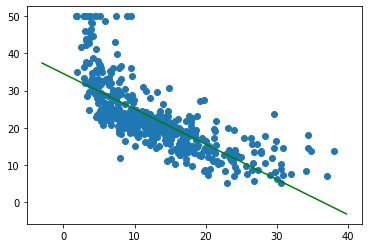

In [9]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(np.arange(-3,40,.25))   # x-coordinate
fitline = list(map(f, steps))       # y-coordinate
pyplot.plot(steps, fitline, color='green')  #it just plots the line
pyplot.scatter(x=X,y=y)    # puts the points

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [10]:
lr_second = LinearRegression()
X=df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=df['target']
lr_second.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [11]:
total = 0
for i in range(len(df)):
  total += (lr_second.predict([X.iloc[i]])-y.iloc[i]) ** 2
mse = total / len(df)
print("MSE : " , mse[0])

MSE :  21.894831181729224


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [12]:
#We can use module mean_squared_error from sklearn.metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [13]:
shuffled = shuffle(df, random_state=1)
shuffled = shuffled.reset_index(drop=True)
print(shuffled.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  0.04932  33.0   2.18   0.0  0.472  6.849  70.3  3.1827   7.0  222.0   
1  0.02543  55.0   3.78   0.0  0.484  6.696  56.4  5.7321   5.0  370.0   
2  0.22927   0.0   6.91   0.0  0.448  6.030  85.5  5.6894   3.0  233.0   
3  0.05789  12.5   6.07   0.0  0.409  5.878  21.4  6.4980   4.0  345.0   
4  3.67822   0.0  18.10   0.0  0.770  5.362  96.2  2.1036  24.0  666.0   

   PTRATIO       B  LSTAT  target  
0     18.4  396.90   7.53    28.2  
1     17.6  396.90   7.18    23.9  
2     17.9  392.74  18.80    16.6  
3     18.9  396.21   8.10    22.0  
4     20.2  380.79  10.19    20.8  


In [14]:
X=shuffled[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Percentage of test to all: ", X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))

X_train shape: (303, 13)
y_train shape: (303,)
X_test shape: (203, 13)
y_test shape: (203,)
Percentage of test to all:  0.40118577075098816


In [16]:
lr_third = LinearRegression()
lr_third.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [17]:
lr_third.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


0.7327830328392094

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,lr_third.predict(X_test))
print("MSE : ", mse)

MSE :  21.144797750563633


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
